# AirBnB Data Analysis: Initial Contact with the Dataset

In the current repository, I will analyze the [AirBnB dataset from the Basque Country / Euskadi](http://insideairbnb.com/get-the-data/). The [Basque Country](https://en.wikipedia.org/wiki/Basque_Country_(autonomous_community)) is the region from Spain I am from; after many years living in Germany, I moved back here in 2020. As a popular touristic target on the seaside, the analysis might be valuable for many visitors :-)

I will follow standard [CRISP-DM process](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining), which usually requires to define some business questions first; then, the data is collected and analyzed following those questions. In the current case, since the dataset was already created, this notebook serves as a first exposure to it, created to formulate the business questions.

Notes about the dataset:

- Among all the files that compose the dataset, the  most interesting to me are:
    - `listings_detailed.csv`: list of all the listed properties and their features
    - `reviews_detailed.csv`: reviews associated to the listed properties
- Link to the [dataset dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896)

Goals:

- Come up with at least three interesting questions.
- Extract the necessary data to answer these questions.
- Perform necessary cleaning, analysis, and modeling.
- Evaluate results.
- Share insights in a blog post.

### Overview of contents in this notebook

1. Load and Inspect Dataset
2. Simplifications and Feature Engineering Decisions
3. Definition of Business Questions
4. Storing of the Simplified Dataset

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 1. Load and Inspect Dataset

In [119]:
listings_df = pd.read_csv('./data/euskadi_2022_03_31/listings_detailed.csv',encoding='utf-8')
reviews_df = pd.read_csv('./data/euskadi_2022_03_31/reviews_detailed.csv',encoding='utf-8')
calendar_df = pd.read_csv('./data/euskadi_2022_03_31/calendar_detailed.csv',encoding='utf-8')
#listings_df = pd.read_csv('./data/seattle_kaggle/listings.csv')
#reviews_df = pd.read_csv('./data/seattle_kaggle/reviews.csv')
#calendar_df = pd.read_csv('./data/seattle_kaggle/calendar.csv')

In [120]:
print(f"Listings: {listings_df.shape}")
listings_df.head()

Listings: (5228, 74)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,132068,https://www.airbnb.com/rooms/132068,20220331053302,2022-03-31,Great attic+terrace+parking. Beach views. ESS0...,"Amazing modern, clean & fully equiped flat of...",Gros es el barrio de moda de Donosti. El apart...,https://a0.muscache.com/pictures/22b9f457-1f65...,648938,https://www.airbnb.com/users/show/648938,...,4.97,4.94,4.75,NaN,t,1,1,0,0,4.43
1,134802,https://www.airbnb.com/rooms/134802,20220331053302,2022-03-31,"Hab Luminosa,tranquila,baño privado",<b>The space</b><br />Habitación en piso compa...,"Zona tranquila, junto a parque con amplias zon...",https://a0.muscache.com/pictures/0832d126-0847...,661293,https://www.airbnb.com/users/show/661293,...,4.67,4.00,3.83,NaN,t,1,0,1,0,0.06
2,142760,https://www.airbnb.com/rooms/142760,20220331053302,2022-03-31,Apto San Juan de Gaztelugatxe,<b>The space</b><br />This charming new apartm...,NaN,https://a0.muscache.com/pictures/71900ac6-da9b...,693119,https://www.airbnb.com/users/show/693119,...,4.57,4.62,4.74,NaN,f,1,1,0,0,0.33
3,309802,https://www.airbnb.com/rooms/309802,20220331053302,2022-03-31,Luxury w/terrace near the beach WIF,<b>The space</b><br />It is located in the pea...,In this neighborhood with a strong personality...,https://a0.muscache.com/pictures/50730214/c462...,1589633,https://www.airbnb.com/users/show/1589633,...,4.20,5.00,4.00,NaN,f,8,7,1,0,0.05
4,309813,https://www.airbnb.com/rooms/309813,20220331053302,2022-03-31,Near the beach with terrace WIFI,Luxury three bedrooms apartment located in a b...,The apartment is located in the area known as ...,https://a0.muscache.com/pictures/47628802/98ac...,1589633,https://www.airbnb.com/users/show/1589633,...,4.58,4.73,4.64,NaN,f,8,7,1,0,0.10


In [121]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228 entries, 0 to 5227
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5228 non-null   int64  
 1   listing_url                                   5228 non-null   object 
 2   scrape_id                                     5228 non-null   int64  
 3   last_scraped                                  5228 non-null   object 
 4   name                                          5228 non-null   object 
 5   description                                   5129 non-null   object 
 6   neighborhood_overview                         2879 non-null   object 
 7   picture_url                                   5228 non-null   object 
 8   host_id                                       5228 non-null   int64  
 9   host_url                                      5228 non-null   o

In [122]:
# Reviews are written in several languages: at least English and Spanish
print(f"Reviews: {reviews_df.shape}")
reviews_df.head()

Reviews: (190058, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,132068,297597,2011-06-04,182987,Irina,"Mikel's place was outrageous, a perfect combin..."
1,132068,12519461,2014-05-04,5175212,Philippine & Grégoire,Mikel appartment is exactly as it is described...
2,132068,12600130,2014-05-05,2789268,Alvaro,La experiencia en el apartamento de Mikel fue ...
3,132068,13253988,2014-05-23,298828,Mayte,"Mikel Es una persona amable, el aspartamento e..."
4,132068,13294951,2014-05-24,7736822,Kaela,Absolutely wonderful apartment. Mikel was very...


In [123]:
print(f"Calendar: {calendar_df.shape}")
calendar_df.head()

Calendar: (1908220, 7)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,132068,2022-03-31,f,$130.00,$130.00,1,63
1,132068,2022-04-01,f,$160.00,$160.00,1,63
2,132068,2022-04-02,f,$160.00,$160.00,1,63
3,132068,2022-04-03,t,$130.00,$130.00,1,63
4,132068,2022-04-04,t,$130.00,$130.00,1,63


In [124]:
# Some location names are not correctly encoded?
# Fix location/neighborhood names; even thhough UTF-8 is used, names where encoded differently?
listings_df['neighbourhood_group_cleansed'] = listings_df['neighbourhood_group_cleansed'].replace({'Gipuzkoa':'Gipuzkoa',
                                                                                                   'Ãlava':'Araba',
                                                                                                   'Bizkaia': 'Bizkaia'})

In [125]:
# Neighborhood groups are Spanish "provincias"
listings_df["neighbourhood_group_cleansed"].value_counts()

Gipuzkoa    2534
Bizkaia     2223
Araba        471
Name: neighbourhood_group_cleansed, dtype: int64

In [126]:
# Some location names are not correctly encoded?
# Fix location/neighborhood names; even thhough UTF-8 is used, names where encoded differently?
listings_df['neighbourhood_cleansed'] = listings_df['neighbourhood_cleansed'].replace({'Donostia-San SebastiÃ¡n':'Donostia-San Sebastian',
                                                                                       'UrduÃ±a-OrduÃ±a':'Urduna-Orduna',
                                                                                       'ValdegovÃ­a':'Valdegovia',
                                                                                       'Mungai':'Mungia'})

Percent of listings in most listed 60 / 196 neighborhoods: 0.8928844682478958


<AxesSubplot:>

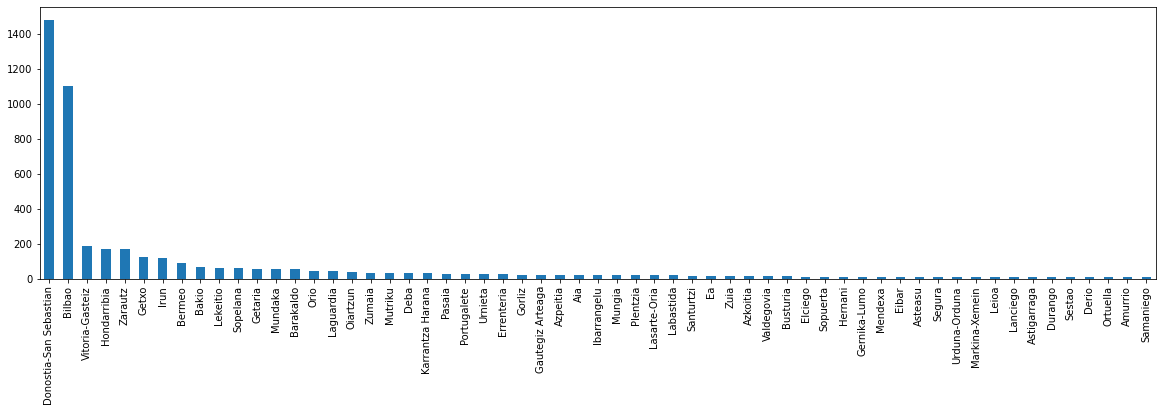

In [127]:
# There are almost 200 city/towns 
all_neighbourhoods = listings_df["neighbourhood_cleansed"].value_counts()
num_listings_per_neighborhood = all_neighbourhoods/all_neighbourhoods.sum()
num_neighborhoods = 60
print(f"Percent of listings in most listed {num_neighborhoods} / {len(all_neighbourhoods)} neighborhoods: {num_listings_per_neighborhood[0:num_neighborhoods-1].sum()}")
#num_listings_per_neighborhood[0:num_neighborhoods-1].sum()
plt.figure(figsize=(20,5))
all_neighbourhoods[0:num_neighborhoods-1].plot(kind="bar")

In [128]:
all_selected_locations = list(all_neighbourhoods[0:num_neighborhoods-1].index)
all_neighbourhoods[0:num_neighborhoods-1].index

Index(['Donostia-San Sebastian', 'Bilbao', 'Vitoria-Gasteiz', 'Hondarribia',
       'Zarautz', 'Getxo', 'Irun', 'Bermeo', 'Bakio', 'Lekeitio', 'Sopelana',
       'Getaria', 'Mundaka', 'Barakaldo', 'Orio', 'Laguardia', 'Oiartzun',
       'Zumaia', 'Mutriku', 'Deba', 'Karrantza Harana', 'Pasaia',
       'Portugalete', 'Urnieta', 'Errenteria', 'Gorliz', 'Gautegiz Arteaga',
       'Azpeitia', 'Aia', 'Ibarrangelu', 'Mungia', 'Plentzia', 'Lasarte-Oria',
       'Labastida', 'Santurtzi', 'Ea', 'Zuia', 'Azkoitia', 'Valdegovia',
       'Busturia', 'Elciego', 'Sopuerta', 'Hernani', 'Gernika-Lumo', 'Mendexa',
       'Eibar', 'Asteasu', 'Segura', 'Urduna-Orduna', 'Markina-Xemein',
       'Leioa', 'Lanciego', 'Astigarraga', 'Durango', 'Sestao', 'Derio',
       'Ortuella', 'Amurrio', 'Samaniego'],
      dtype='object')

In [129]:
# Locations with a beach in less than 2km (checked manually in Google Maps)
# New feature that could explain price/reviews
beach_locations = ['Donostia-San Sebastian', 'Hondarribia',
       'Zarautz', 'Getxo', 'Irun', 'Bermeo', 'Bakio', 'Lekeitio', 'Sopelana',
       'Getaria', 'Mundaka', 'Orio', 'Zumaia', 'Mutriku', 'Deba', 'Portugalete',
       'Gorliz', 'Gautegiz Arteaga', 'Ibarrangelu', 'Plentzia', 'Santurtzi', 'Ea',
       'Busturia', 'Gernika-Lumo', 'Mendexa', 'Leioa', 'Astigarraga', 'Sestao',
       'Ortuella']

In [130]:
# Half of the selected locations are coastal places or are close to a beach
len(beach_locations)

29

<AxesSubplot:xlabel='review_scores_rating', ylabel='Count'>

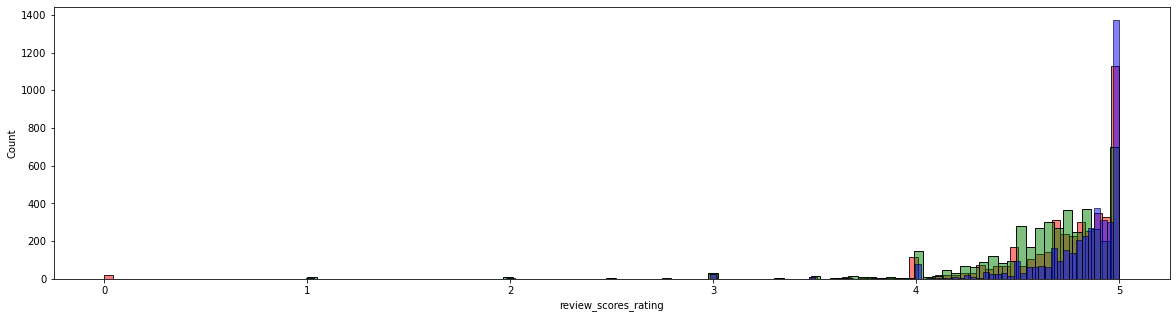

In [131]:
# Review scores are mainly concentrated in the range 4-5
plt.figure(figsize=(20,5))
sns.histplot(listings_df['review_scores_rating'],color='red',alpha=0.5)
sns.histplot(listings_df['review_scores_value'],color='green',alpha=0.5)
sns.histplot(listings_df['review_scores_accuracy'],color='blue',alpha=0.5)

In [132]:
# The bathroom is presumably an important feature
# Which categories are defined?
listings_df['bathrooms_text'].value_counts()

1 bath               1932
2 baths              1182
1 private bath        598
1 shared bath         515
1.5 baths             292
3 baths               168
1.5 shared baths       92
2 shared baths         87
2.5 baths              72
4 baths                38
3.5 baths              27
5 baths                23
4 shared baths         19
6 baths                18
3 shared baths         17
0 shared baths         14
Half-bath              12
2.5 shared baths       11
8 baths                10
5.5 baths              10
4.5 baths              10
Shared half-bath        9
6.5 baths               8
0 baths                 8
3.5 shared baths        7
7 baths                 4
4.5 shared baths        3
8 shared baths          3
7.5 shared baths        2
6 shared baths          2
8.5 baths               2
7 shared baths          1
5 shared baths          1
9.5 baths               1
11 baths                1
5.5 shared baths        1
Private half-bath       1
7.5 baths               1
Name: bathro

In [133]:
# The room type is presumably an important feature
# Which categories are defined?
listings_df['room_type'].value_counts()

Entire home/apt    3535
Private room       1605
Hotel room           57
Shared room          31
Name: room_type, dtype: int64

In [134]:
# Price is encoded as a string; convert it to float
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)

In [135]:
# There are some outliers in terms of price
listings_df['price'].describe()

count     5228.000000
mean       153.575363
std        459.766990
min          8.000000
25%         69.000000
50%        100.000000
75%        159.000000
max      16800.000000
Name: price, dtype: float64

In [136]:
# Number of properties with a price larger than 1000 EUR/USD
listings_df[listings_df.price > 1000]['price'].count()

26

In [137]:
# Less than 0.4% of the properties have a price larger than 1000 EUR/USD
# Those are probably outliers
listings_df[listings_df.price > 1000]['price'].count()/listings_df['price'].count()

0.004973221117061974

<AxesSubplot:ylabel='Frequency'>

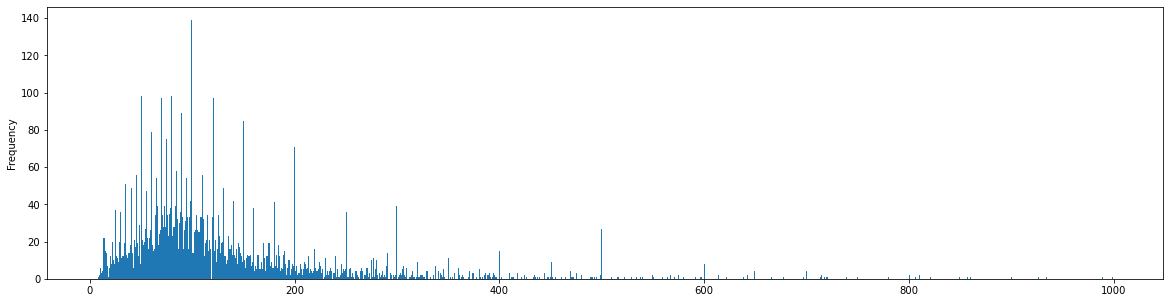

In [138]:
# Price distribution below 1000 EUR/USD
plt.figure(figsize=(20,5))
listings_df[listings_df.price < 1000]['price'].plot(kind="hist", bins=1000)

In [139]:
# All columns in listings_df
# Not all are relevant
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [140]:
# Manual selection of relevant columns
# Initial drop; feature engineering selection needs to be done yet
# Can be removed: 'scrape_id', 'last_scraped', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'bathrooms', 'calendar_last_scraped'
selected_features = ['id', 'name', 'listing_url', 'description',
       'neighborhood_overview', 'host_id', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

In [141]:
# Strings: some feeature engineering is required
listings_df[selected_features].select_dtypes(['object']).columns

Index(['name', 'listing_url', 'description', 'neighborhood_overview',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'bathrooms_text', 'amenities',
       'has_availability', 'first_review', 'last_review', 'license',
       'instant_bookable'],
      dtype='object')

In [142]:
# Float values
listings_df[selected_features].select_dtypes(['float']).columns

Index(['latitude', 'longitude', 'bedrooms', 'beds', 'price',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [143]:
# Integer values
listings_df[selected_features].select_dtypes(['int']).columns

Index(['id', 'host_id', 'host_listings_count', 'host_total_listings_count',
       'accommodates', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

## 2. Simplifications and Feature Engineering Decisions

Some simplifications:

- I focus on the `listings_detailed.csv` table, and maybe on the `reviews_detailed.csv`later.
- Only the first 60 (of 196) locations with most listings considered in `listings`; they amount to 89% of the listings. I will add some manual features based on the location (like is the location closer than 2km to a beach), so the reduction easens the analysis without probably changing the conclusions.
- Some columns from `listings` will be dropped: URLs, scrapping info, etc.

Some feature engineering ideas:

- license: has or not (1,0)
- review scores: use mean
- first_review: days since today
- last_review: days since today
- has_availability: 1,0
- price: value
- amenities: detect which (set) + get dummies
- bath_text: parse and get dummies: maybe break down to num_baths and bath_shared
- room_type: detect which + dummies
- property_type: detect which + dummies
- host_identity_verified: 1,0
- host_prof_pic: has or not: 1,0
- host_verifications: detect which + dummies
- host_is_superhost: 1,0
- host_response_rate: extract number
- host_acceptance_rate: extract number
- host_response_time: detect categories + get dummies
- host_about: has text or not (1,0)
- host_location: same as property or not (1,0)
- host_since: days since today
- description: break down to is English / Spanish?

## 3. Definition of Business Questions

1. Can the features in `listings` predict the mean **price**? Which are the most important features that increase the **price**? Are there any bargains (i.e., properties with high reviews that have a greater predicted price than the actual).
2. Donostia-San Sebastian and Bilbao have the majority of the listings. Which are the most important differences between both cities in terms of features?
3. The Basque Country is on the seaside; however, some locations have direct access to a nearby beach in less than 2 km. Which are the most important differences between locations with beach access and locations without?
4. EXTRA: Is it possible to predict the mean review score with the review texts? Which are the most impactful words that are associated with higher review scores?

## 4. Storing of the Simplified Dataset

In [144]:
# Initial size
listings_df.shape

(5228, 74)

In [145]:
# Remove price outliers
listings = listings_df[listings_df.price <= 1000]

In [146]:
# Take only relevant features
listings = listings[selected_features]

In [147]:
# Take only items from all_selected_locations
listings['selected_location'] = listings['neighbourhood_cleansed'].apply(lambda x: 1 if x in all_selected_locations else 0)
listings = listings[listings.selected_location == 1]
listings.drop(['selected_location'], axis=1, inplace=True)

In [148]:
listings.shape

(4642, 66)

In [149]:
# New feature: has_beach - if beach access in less than 2km
listings['has_beach'] = listings['neighbourhood_cleansed'].apply(lambda x: 1 if x in beach_locations else 0)

In [150]:
# Percent of listings associated with a location with access to a beach
listings['has_beach'].sum()/listings.shape[0]

0.6072813442481689

In [151]:
# Final shape
listings.shape

(4642, 67)

In [152]:
listings.head(2)

,id,name,listing_url,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_beach
0,132068,Great attic+terrace+parking. Beach views. ESS0...,https://www.airbnb.com/rooms/132068,"Amazing modern, clean & fully equiped flat of...",Gros es el barrio de moda de Donosti. El apart...,648938,Mikel,2011-05-31,"San Sebastian, Basque Country, Spain",Nací y crecí en San Sebastian. Al igual que vo...,...,4.94,4.75,NaN,t,1,1,0,0,4.43,1
1,134802,"Hab Luminosa,tranquila,baño privado",https://www.airbnb.com/rooms/134802,<b>The space</b><br />Habitación en piso compa...,"Zona tranquila, junto a parque con amplias zon...",661293,Roberto,2011-06-03,"Bilbao, Basque Country, Spain","No me gusta describirme, porque seguramente no...",...,4.00,3.83,NaN,t,1,0,1,0,0.06,0


In [153]:
listings.tail(2)

,id,name,listing_url,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_beach
5226,49258914,Plage à 15 min et dégustation de pintxo à Irun...,https://www.airbnb.com/rooms/49258914,Charmant T2 situé au cœur du centre ville d'He...,NaN,9015799,Maite,2013-09-23,"Hendaye, Nouvelle-Aquitaine, France",Laissez votre voiture dans les places de parki...,...,NaN,NaN,NaN,f,1,1,0,0,NaN,1
5227,17170605,Duplex céntrico en primera línea de playa.,https://www.airbnb.com/rooms/17170605,Duplex en primera línea de playa y en el centr...,El apartamento se encuentra en primera línea d...,44871756,Teresa,2015-09-22,"Zarautz, Euskadi, Spain",NaN,...,4.99,4.79,ESS00673,f,1,1,0,0,1.38,1


In [154]:
# Final features
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4642 entries, 0 to 5227
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4642 non-null   int64  
 1   name                                          4642 non-null   object 
 2   listing_url                                   4642 non-null   object 
 3   description                                   4554 non-null   object 
 4   neighborhood_overview                         2555 non-null   object 
 5   host_id                                       4642 non-null   int64  
 6   host_name                                     4642 non-null   object 
 7   host_since                                    4642 non-null   object 
 8   host_location                                 4638 non-null   object 
 9   host_about                                    2385 non-null   o

In [155]:
filename = './data/euskadi_2022_03_31/listings_detailed_reduced.csv'
listings.to_csv(filename, index=False, header=True)

In [156]:
listings = pd.read_csv(filename)

In [157]:
listings.shape

(4642, 67)

In [158]:
listings.head(2)

,id,name,listing_url,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_beach
0,132068,Great attic+terrace+parking. Beach views. ESS0...,https://www.airbnb.com/rooms/132068,"Amazing modern, clean & fully equiped flat of...",Gros es el barrio de moda de Donosti. El apart...,648938,Mikel,2011-05-31,"San Sebastian, Basque Country, Spain",Nací y crecí en San Sebastian. Al igual que vo...,...,4.94,4.75,NaN,t,1,1,0,0,4.43,1
1,134802,"Hab Luminosa,tranquila,baño privado",https://www.airbnb.com/rooms/134802,<b>The space</b><br />Habitación en piso compa...,"Zona tranquila, junto a parque con amplias zon...",661293,Roberto,2011-06-03,"Bilbao, Basque Country, Spain","No me gusta describirme, porque seguramente no...",...,4.00,3.83,NaN,t,1,0,1,0,0.06,0


In [159]:
listings.tail(2)

,id,name,listing_url,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_beach
4640,49258914,Plage à 15 min et dégustation de pintxo à Irun...,https://www.airbnb.com/rooms/49258914,Charmant T2 situé au cœur du centre ville d'He...,NaN,9015799,Maite,2013-09-23,"Hendaye, Nouvelle-Aquitaine, France",Laissez votre voiture dans les places de parki...,...,NaN,NaN,NaN,f,1,1,0,0,NaN,1
4641,17170605,Duplex céntrico en primera línea de playa.,https://www.airbnb.com/rooms/17170605,Duplex en primera línea de playa y en el centr...,El apartamento se encuentra en primera línea d...,44871756,Teresa,2015-09-22,"Zarautz, Euskadi, Spain",NaN,...,4.99,4.79,ESS00673,f,1,1,0,0,1.38,1


In [160]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4642 entries, 0 to 4641
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4642 non-null   int64  
 1   name                                          4642 non-null   object 
 2   listing_url                                   4642 non-null   object 
 3   description                                   4554 non-null   object 
 4   neighborhood_overview                         2555 non-null   object 
 5   host_id                                       4642 non-null   int64  
 6   host_name                                     4642 non-null   object 
 7   host_since                                    4642 non-null   object 
 8   host_location                                 4638 non-null   object 
 9   host_about                                    2385 non-null   o

In [161]:
listings[listings['has_beach'].isnull()]['neighbourhood_cleansed']

Series([], Name: neighbourhood_cleansed, dtype: object)